# **Module Installations**

In [8]:
!pip install scikit-learn

In [9]:
!pip install collection

In [10]:
!pip install tld

In [11]:
!pip install scikit-metrics

In [12]:
!pip install tldextract

# **Data Representations**

In [13]:
import pandas as pd
import numpy as np

#Now we just get a glimpse of the data-set of malicious URL so that we can get an idea of how to proceed
df = pd.read_csv('malicious_phish.csv')
print(df.shape)
print(df.head())
df.type.value_counts()

(651191, 2)
                                                 url        type
0                                   br-icloud.com.br    phishing
1                mp3raid.com/music/krizz_kaliko.html      benign
2                    bopsecrets.org/rexroth/cr/1.htm      benign
3  http://www.garage-pirenne.be/index.php?option=...  defacement
4  http://adventure-nicaragua.net/index.php?optio...  defacement


type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [14]:
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
df_malware = df[df.type == "malware"]
df_phishing = df[df.type  == "phishing"]
df_defacement = df[df.type  == "defacement"]
df_benign = df[df.type  == "benign"]

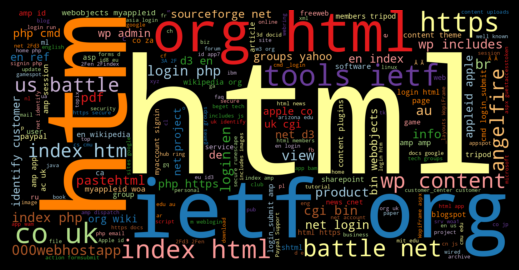

In [15]:
phishing_url = " ".join(i for i in df_phishing.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phishing_url)
plt.figure( figsize=(5,7),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

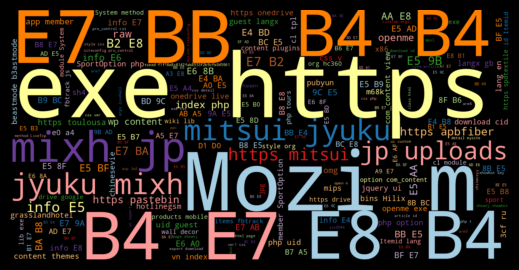

In [16]:
malware_url = " ".join(i for i in df_malware.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(5,7),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

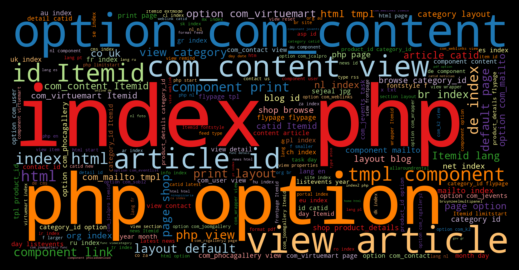

In [17]:
defacement_url = " ".join(i for i in df_defacement.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(defacement_url)
plt.figure( figsize=(5,7),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

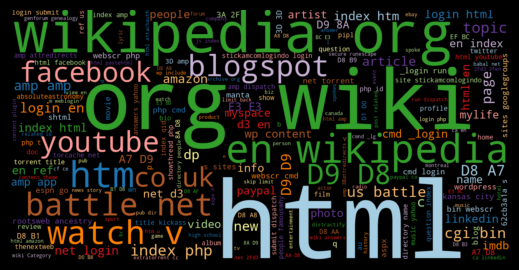

In [18]:
benign_url = " ".join(i for i in df_benign.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(benign_url)
plt.figure( figsize=(5,7),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# **Feature Engineering**

In [19]:
import re

#Checking if the URL contains any IP address. It adds another column in the dataframe called "use of ip" which basically tells whether the url contains any ip in the url

def url_with_ip_address(url):
    matching = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 normal form
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if matching:
      return 1
    else:
      return 0

df['use_of_ip'] = df['url'].apply(lambda i: url_with_ip_address(i))
print(df.head())


                                                 url        type  use_of_ip
0                                   br-icloud.com.br    phishing          0
1                mp3raid.com/music/krizz_kaliko.html      benign          0
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0


In [20]:
from urllib.parse import urlparse

#This basicall finds that the host name is whether the part of the actual URl and if not then it is an abnormal URL

def find_abnormal_url(url):
  hostname = str(urlparse(url).hostname)
  matching = re.search(hostname, url)
  if matching:
    return 1
  else:
    return 0

df["abnormal_url"] = df["url"].apply(lambda i: find_abnormal_url(i))
print(df.head())



                                                 url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  
0             0  
1             0  
2             0  
3             1  
4             1  


In [21]:
from googlesearch import search

#here basically we determine whether the url in google indexed or not. IDK how much this gonna help but lets see

def google_indexed(url):
  site = search(url,5)
  return 1 if site else 0
df['google_indexed'] = df['url'].apply(lambda i: google_indexed(i))
print(df.head())

                                                 url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  google_indexed  
0             0               1  
1             0               1  
2             0               1  
3             1               1  
4             1               1  


In [22]:
from urllib.parse import urlparse
#Now we count different attributes present in the URLs like no. of "www", "@",shortning services used, https or http site, url length, host name etc

def count_dot(url): #count the no. of "." for each url and add the column to the data fame
    return url.count('.')
df['dot_count'] = df['url'].apply(lambda i: count_dot(i))


def count_www(url): #count the no. of "www" for each url and add the column to the data fame
  return url.count("www")
df["www_count"] = df["url"].apply(lambda i :count_www(i))


def count_atrateof(url):  #count the no. of "@" for each url and add the column to the data fame
  return url.count("@")
df["@_count"] = df["url"].apply(lambda i: count_atrateof(i))


def count_directories(url):  #count the no. of "@" for each url and add the column to the data fame
  return url.count("/")
df["dir_count"] = df["url"].apply(lambda i: count_directories(i))


def count_embedded_domain(url): #count the no. of embedded domains in the url which can be calculated by counted by the no of "//" in the url
  return url.count("//")
df["embedd_dom_count"] = df["url"].apply(lambda i : count_embedded_domain(i))


def short_url(url):
  matching = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',url)
  if matching:
    return 1
  else:
    return 0

df["short_url"] = df["url"].apply(lambda i : short_url(i))


def count_https(url): #Check if the url is an https site or not
  return url.count("https")
df["https_site"] = df["url"].apply(lambda i : count_https(i))


def count_http(url): #Check if the url is an http site or not
  return url.count("http")
df["http_site"] = df["url"].apply(lambda i : count_http(i))


def cent_per_url(url): #Count the no. of % in the url
  return url.count("%")
df["%_count"] = df["url"].apply(lambda i : cent_per_url(i))


def count_ques(url): #Count the no. of "?" in the url
    return url.count('?')
df['?_count'] = df['url'].apply(lambda i: count_ques(i))


def count_hyphen(url): #Count the no. of "-" in the url
    return url.count('-')
df['-_count'] = df['url'].apply(lambda i: count_hyphen(i))


def count_equal(url): #Count the no. of "=" in the url
    return url.count('=')
df['=_count'] = df['url'].apply(lambda i: count_equal(i))


def url_len(url): #calculate the length of the url
  return len(str(url))
df['url_len'] = df['url'].apply(lambda i: url_len(i))


def hname_len(url): #calculate the length of the hostname
  return len(urlparse(url).netloc)
df['hostname_len'] = df['url'].apply(lambda i: hname_len(i))


def suspicious_words(url): #check if the url does have any words concerning payment websites, free stuffs etc
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0
df['sus_url'] = df['url'].apply(lambda i: suspicious_words(i))


def count_digits(url): #count the no. of digits in the url
  digits_count = 0
  for i in url:
    if i.isnumeric():
      digits_count += 1
    return digits_count
df['digits_count']= df['url'].apply(lambda i: count_digits(i))


def letter_count(url):  #count the no. of alphabet in the url
  letters_count = 0
  for i in url:
    if i.isalpha():
      letters_count += 1
    return letters_count
df['letter_counts']= df['url'].apply(lambda i: letter_count(i))

df.head()


,url,type,use_of_ip,abnormal_url,google_indexed,dot_count,www_count,@_count,dir_count,embedd_dom_count,...,http_site,%_count,?_count,-_count,=_count,url_len,hostname_len,sus_url,digits_count,letter_counts
0,br-icloud.com.br,phishing,0,0,1,2,0,0,0,0,...,0,0,0,1,0,16,0,0,0,1
1,mp3raid.com/music/krizz_kaliko.html,benign,0,0,1,2,0,0,2,0,...,0,0,0,0,0,35,0,0,0,1
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,0,1,2,0,0,3,0,...,0,0,0,0,0,31,0,0,0,1
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,1,1,3,1,0,3,1,...,1,0,1,1,4,88,21,0,0,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,1,1,2,0,0,3,1,...,1,0,1,1,3,235,23,0,0,1


In [23]:
from tldextract import extract
from urllib.parse import urlparse
import os.path

def first_directory_len(url): #this returns the length of the first directory
  urlpath = urlparse(url).path
  try:
    return len(urlpath.split('/')[1])
  except:
    return 0
df["first_dir_len"] = df["url"].apply(lambda i: first_directory_len(i))


#now we add another column known as top level domain i.e., the ".com", ".in",etc
df["tld"] = df["url"].apply(lambda i: extract(i).suffix)
#now we find the length of the top level domain
def tld_len(tld):
  return len(tld)
df["tld_length"] = df["url"].apply(lambda i: tld_len(i))


print(df.head())
print(df.columns)
print(df['type'].value_counts())





                                                 url        type  use_of_ip  \
0                                   br-icloud.com.br    phishing          0   
1                mp3raid.com/music/krizz_kaliko.html      benign          0   
2                    bopsecrets.org/rexroth/cr/1.htm      benign          0   
3  http://www.garage-pirenne.be/index.php?option=...  defacement          0   
4  http://adventure-nicaragua.net/index.php?optio...  defacement          0   

   abnormal_url  google_indexed  dot_count  www_count  @_count  dir_count  \
0             0               1          2          0        0          0   
1             0               1          2          0        0          2   
2             0               1          2          0        0          3   
3             1               1          3          1        0          3   
4             1               1          2          0        0          3   

   embedd_dom_count  ...  -_count  =_count  url_len  hostname_

# **Exploratory Data Analysis and Data Visualisation**




<Axes: xlabel='type', ylabel='count'>

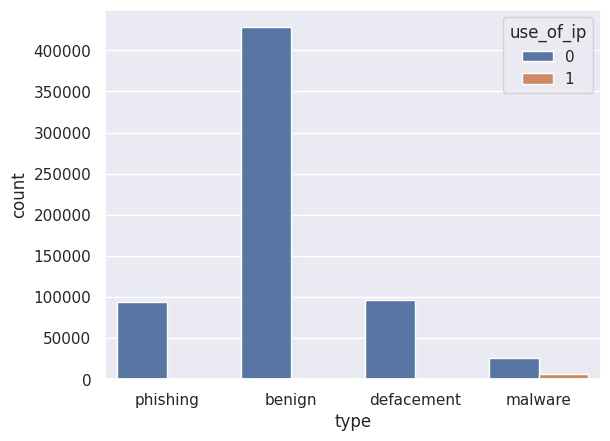

In [24]:
import seaborn as sb

sb.set(style = "darkgrid")
sb.countplot(x="type", data = df , hue = "use_of_ip")

<Axes: xlabel='type', ylabel='count'>

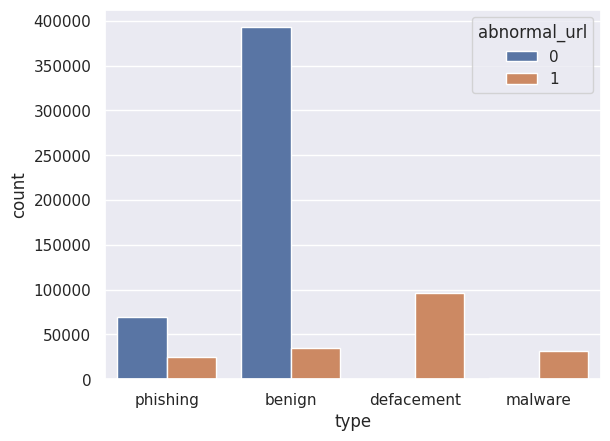

In [25]:
sb.set(style = "darkgrid")
sb.countplot(x="type", data = df , hue = "abnormal_url")

<Axes: xlabel='type', ylabel='count'>

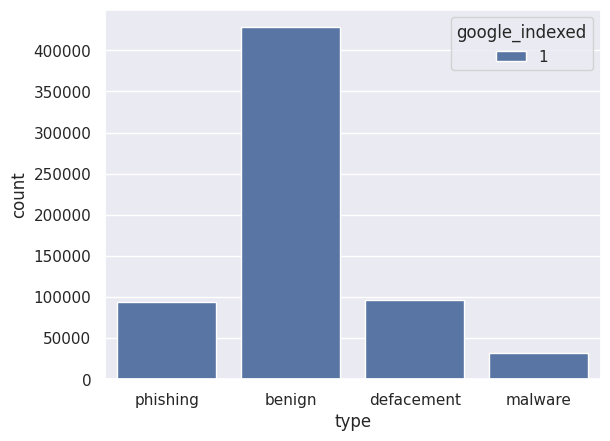

In [26]:
sb.set(style = "darkgrid")
sb.countplot(x="type", data = df , hue = "google_indexed")

<Axes: xlabel='type', ylabel='count'>

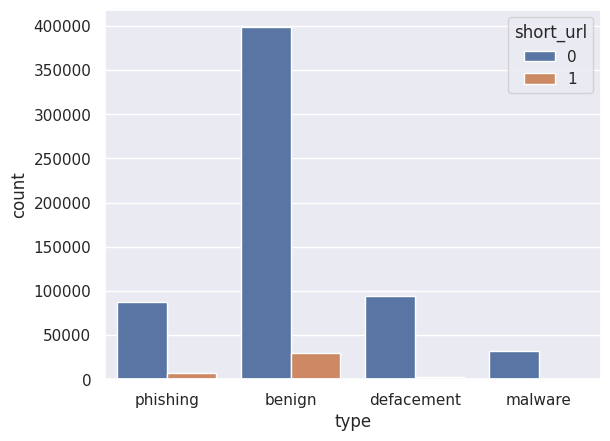

In [27]:
sb.set(style = "darkgrid")
sb.countplot(x="type", data = df , hue = "short_url")

<Axes: xlabel='type', ylabel='count'>

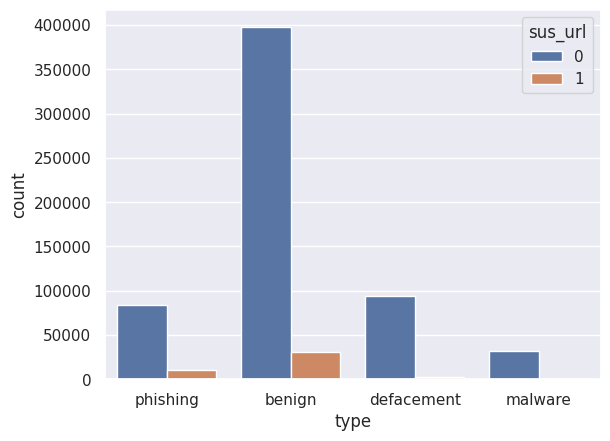

In [28]:
sb.set(style = "darkgrid")
sb.countplot(x="type", data = df , hue = "sus_url")

<Axes: xlabel='type', ylabel='count'>

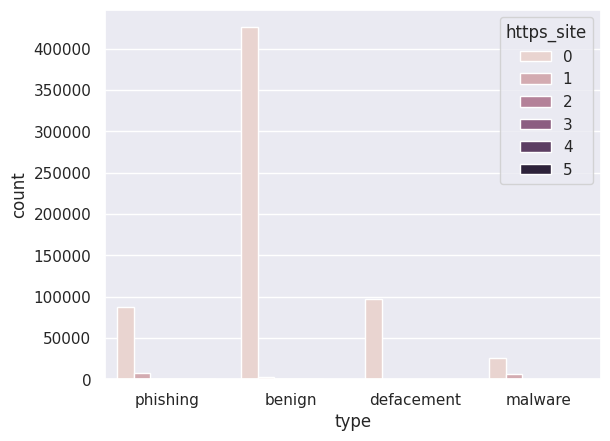

In [29]:
sb.set(style = "darkgrid")
sb.countplot(x="type", data = df , hue = "https_site")

<Axes: xlabel='type', ylabel='count'>

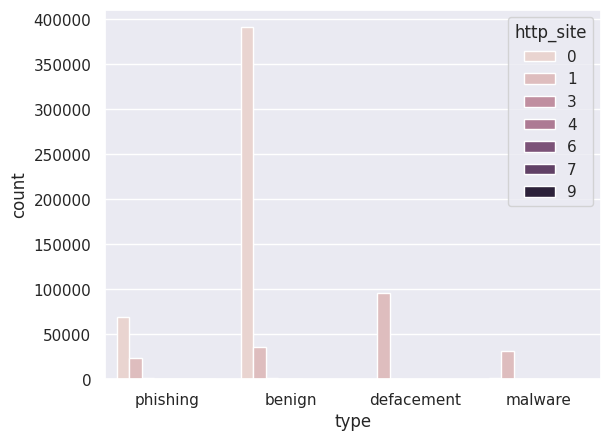

In [30]:
sb.set(style = "darkgrid")
sb.countplot(x="type", data = df , hue = "http_site")

Now use boxplot to see how different values are distributed in what frequency and to identify the outliers.

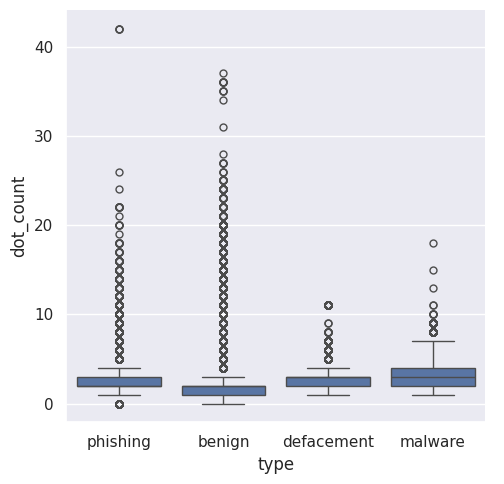

In [31]:
sb.set(style = "darkgrid")
sb.catplot( x="type",
            y="dot_count",
            data=df,
            kind='box');

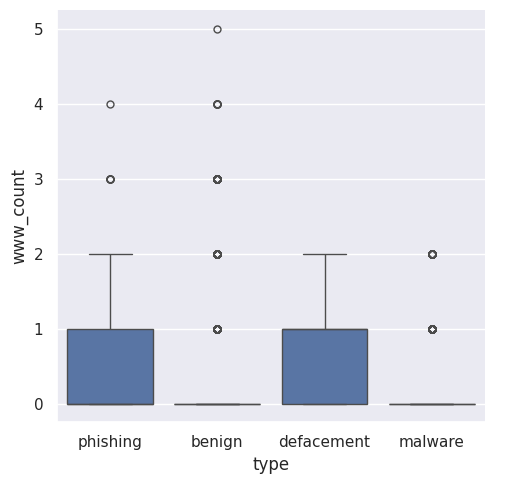

In [32]:
sb.set(style = "darkgrid")
sb.catplot( x="type",
            y="www_count",
            data=df,
            kind='box');

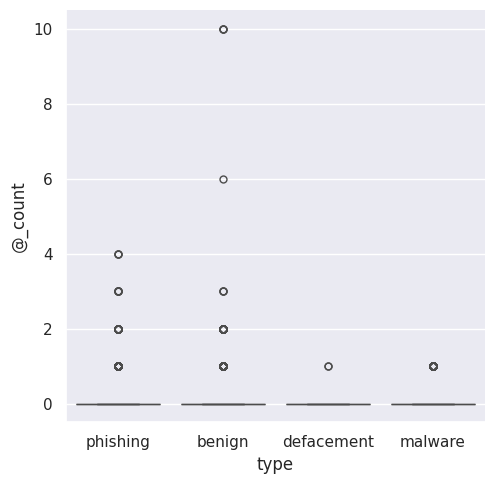

In [33]:
sb.set(style = "darkgrid")
sb.catplot( x="type",
            y="@_count",
            data=df,
            kind='box');

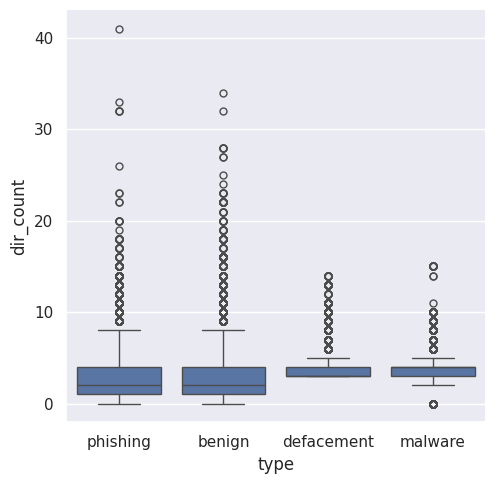

In [34]:
sb.set(style = "darkgrid")
sb.catplot( x="type",
            y="dir_count",
            data=df,
            kind='box');

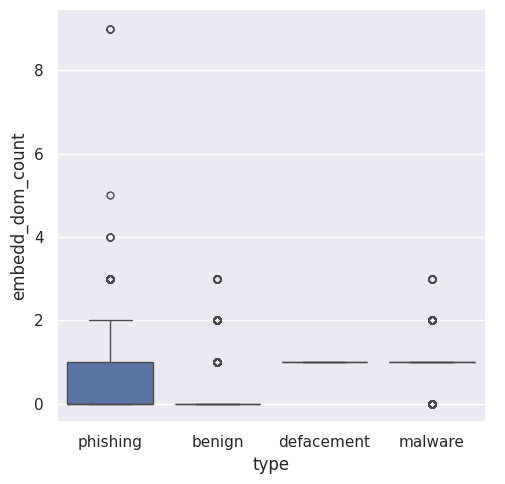

In [35]:
sb.set(style = "darkgrid")
sb.catplot( x="type",
            y="embedd_dom_count",
            data=df,
            kind='box');

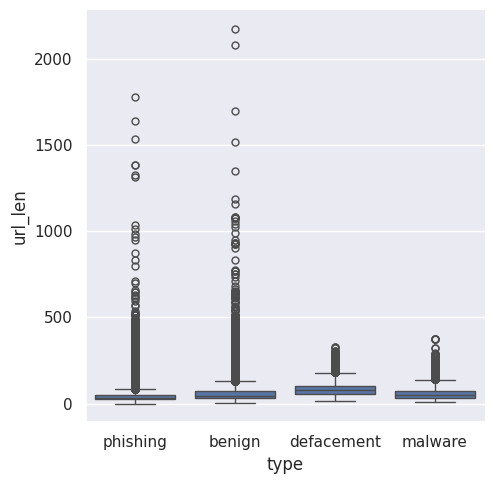

In [36]:
sb.set(style = "darkgrid")
sb.catplot( x="type",
            y="url_len",
            data=df,
            kind='box');

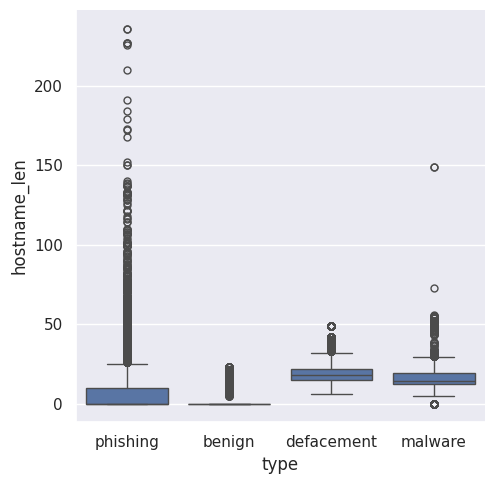

In [37]:
sb.set(style = "darkgrid")
sb.catplot( x="type",
            y="hostname_len",
            data=df,
            kind='box');

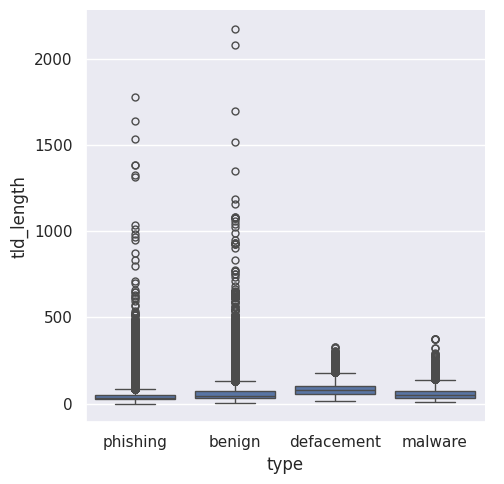

In [38]:
sb.set(style = "darkgrid")
sb.catplot( x="type",
            y="tld_length",
            data=df,
            kind='box');

# **Data Cleaning**

In [39]:
print(df.columns)
df = df.drop(columns = ['tld','google_indexed', 'url'])
#since tld is not numeric we can not use it to train our machine learning model
#since all the url are google indexed hense we don't need this column
#all out feature extraction is done from the url hense we now don't need this column as well in training the model

print(df.columns)
print(df.head())

Index(['url', 'type', 'use_of_ip', 'abnormal_url', 'google_indexed',
       'dot_count', 'www_count', '@_count', 'dir_count', 'embedd_dom_count',
       'short_url', 'https_site', 'http_site', '%_count', '?_count', '-_count',
       '=_count', 'url_len', 'hostname_len', 'sus_url', 'digits_count',
       'letter_counts', 'first_dir_len', 'tld', 'tld_length'],
      dtype='object')
Index(['type', 'use_of_ip', 'abnormal_url', 'dot_count', 'www_count',
       '@_count', 'dir_count', 'embedd_dom_count', 'short_url', 'https_site',
       'http_site', '%_count', '?_count', '-_count', '=_count', 'url_len',
       'hostname_len', 'sus_url', 'digits_count', 'letter_counts',
       'first_dir_len', 'tld_length'],
      dtype='object')
         type  use_of_ip  abnormal_url  dot_count  www_count  @_count  \
0    phishing          0             0          2          0        0   
1      benign          0             0          2          0        0   
2      benign          0             0         

# **Target Encoding**

In [40]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
print(df["type_code"].value_counts())

type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64


# **Creation of features and target**

In [41]:
#now we make a list of the independent variables and assign the target variable

x = df[['use_of_ip', 'abnormal_url', 'dot_count', 'www_count',
       '@_count', 'dir_count', 'embedd_dom_count', 'short_url', 'https_site',
       'http_site', '%_count', '?_count', '-_count', '=_count', 'url_len',
       'hostname_len', 'sus_url', 'digits_count', 'letter_counts',
       'first_dir_len', 'tld_length']] #independent variables

y = df["type_code"]

print(x.head())


   use_of_ip  abnormal_url  dot_count  www_count  @_count  dir_count  \
0          0             0          2          0        0          0   
1          0             0          2          0        0          2   
2          0             0          2          0        0          3   
3          0             1          3          1        0          3   
4          0             1          2          0        0          3   

   embedd_dom_count  short_url  https_site  http_site  ...  ?_count  -_count  \
0                 0          0           0          0  ...        0        1   
1                 0          0           0          0  ...        0        0   
2                 0          0           0          0  ...        0        0   
3                 1          0           0          1  ...        1        1   
4                 1          0           0          1  ...        1        1   

   =_count  url_len  hostname_len  sus_url  digits_count  letter_counts  \
0        0 

# **Test Train Split**

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, shuffle=True, random_state=5)

# **Model Building**

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_features="sqrt")
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))

score = accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

      benign       0.97      0.98      0.98     85621
  defacement       0.98      0.99      0.98     19292
    phishing       0.98      0.94      0.96      6504
     malware       0.90      0.85      0.87     18822

    accuracy                           0.96    130239
   macro avg       0.96      0.94      0.95    130239
weighted avg       0.96      0.96      0.96    130239

accuracy:   0.962


# **Prediction**

In [44]:
from tldextract import extract

def extract_values(url):
  status_val = []
  status_val.append(url_with_ip_address(url))
  status_val.append(find_abnormal_url(url))
  status_val.append(count_dot(url))
  status_val.append(count_www(url))
  status_val.append(count_atrateof(url))
  status_val.append(count_directories(url))
  status_val.append(count_embedded_domain(url))
  status_val.append(short_url(url))
  status_val.append(count_https(url))
  status_val.append(count_http(url))
  status_val.append(cent_per_url(url))
  status_val.append(count_ques(url))
  status_val.append(count_hyphen(url))
  status_val.append(count_equal(url))
  status_val.append(url_len(url))
  status_val.append(hname_len(url))
  status_val.append(suspicious_words(url))
  status_val.append(count_digits(url))
  status_val.append(letter_count(url))
  status_val.append(first_directory_len(url))

  tld = extract(url).suffix
  status_val.append(tld_len(tld))

  return status_val


def predict(extracted_url):
  extracted_features = extract_values(extracted_url)
  extracted_features = np.array(extracted_features).reshape((1, -1))

  prediction = rf.predict(extracted_features)
  if int(prediction) == 0:
    return "SAFE"
  elif int(prediction) == 1.0:
    return "DEFACEMENT"
  elif int(prediction) == 2.0:
    return "MALWARE"
  elif int(prediction) == 3.0:
    return "PHISHING"

url = input("Enter URL to test")
result = predict(url)
print(result)

Enter URL to testwww.spacex.com
SAFE


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
<ipython-input-44-b0c1d668e79e>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if int(prediction) == 0:
